
# Data Madness project - group 9 

- Thomas Sijpkens i6121270
- Rudy Wessels i6195852
- Dimitar Popov i6160150

Note: Besides the original locations, all the uses datasets can be found here:
- https://drive.google.com/drive/folders/1YoKbv9q6G9ceOTW_FvuPG6FOQCcSbfLM

# Data Gathering Compilation

The purpose of this notebook is to create one coherent dataset from metacritic, steam review, and steam general information.  

The following was done:

In [1]:
import numpy as np
import pandas as pd

#read the three data sets
metacritic = pd.read_csv("data/metacritic_critic_reviews.csv")
steam_reviews = pd.read_csv("data/steam_reviews.csv")
steam_general = pd.read_csv("data/steam-general.csv")

# What's in the data?

## metacritic contains:

- name: of the company making the review
- review: the worded review
- game: name of the game
- platform: what platform the game is from
- score: the value that metacritic estimates the reviewers on a 1-100 scale (How they do this: https://www.metacritic.com/about-metascores)
- date: when was the review made

## steam_reviews contains:

- date_posted: when review was posted
- funny: how many users found review funny
- helpful: how many users found reviews helpful
- hour_played: how many hour has the reviewer played the game
- is_early_access_review: whether review was made when game was in Early-Access
- recommendation: whether game was recomended or not
- review: written review
- title: name of game 

## steam_general contains:

- QueryID - (Integer) The original ID in idlist.csv
- ResponseID - (Integer) The ID returned in the Steam response (should equal QueryID)
- QueryName - (Text) The original name in idlist.csv
- ResponseName - (Text) The name returned in the Steam response (should equal QueryName)
- ReleaseDate - (Text) Appears to the be the initial release date for the game
- RequiredAge - (Integer) list named required_age in JSON
- DemoCount - (TextualCount) list named demos in JSON
- DeveloperCount - (TextualCount) list named developers in JSON
- DLCCount - (TextualCount) list named dlc in JSON
- Metacritic - (Integer) numeric score from metacritic object in JSON
- MovieCount - (TextualCount) list named movies in JSON (used object id for unique count)
- PackageCount - (TextualCount) list named packages in JSON
- RecommendationCount - (Integer) from recommendations.total in JSON
- PublisherCount - (TextualCount) list named publishers in JSON
- ScreenshotCount - (TextualCount) list named screenshots in JSON
- AchievementCount - (Integer) achievements.total in JSON
- AchievementHighlightedCount - (TextualCount) for achievements.highlighted in JSON
- ControllerSupport - (Boolean) True if controller_support was full
- IsFree - (Boolean) is_free in JSON
- FreeVerAvail - (Boolean) True if is_free_license is True in package_groups list
- PurchaseAvail - (Boolean) True if price_in_cents_with_discount greater than 0 in package_groups list
- SubscriptionAvail - (Boolean) True if is_recurring_subscription is True in package_groups
- PlatformWindows - (Boolean) True if platforms.windows is True
- PlatformLinux - (Boolean) True if platforms.linux is True
- PlatformMac - (Boolean) True if platforms.mac is True
- PCReqsHaveMin - (Boolean) True if pc_requirements.minimum is non-empty string
- PCReqsHaveRec - (Boolean) True if pc_requirements.recommended is non-empty string
- LinuxReqsHaveMin - (Boolean) True if linux_requirements.minimum is non-empty string
- LinuxReqsHaveRec - (Boolean) True if linux_requirements.recommended is non-empty string
- MacReqsHaveMin - (Boolean) True if mac_requirements.minimum is non-empty string
- MacReqsHaveRec - (Boolean) True if mac_requirements.recommended is non-empty string
- CategorySinglePlayer - (Boolean) True if for any i, categories[i].description is "single-player"
- CategoryMultiplayer - (Boolean) True if for any i, categories[i].description is one of: "cross-platform multiplayer", "local multi-player", "multi-player", "online multi-player", "shared/split screen"
- CategoryCoop - (Boolean) True if for any i, categories[i].description is one of: "co-op", "local co-op", "online co-op"
- CategoryMMO - (Boolean) True if for any i, categories[i].description is "mmo"
- CategoryInAppPurchase - (Boolean) True if for any i, categories[i].description is "in-app purchases"
- CategoryIncludeSrcSDK - (Boolean) True if for any i, categories[i].description is "includes source sdk"
- CategoryIncludeLevelEditor - (Boolean) True if for any i, categories[i].description is "includes level editor"
- CategoryVRSupport - (Boolean) True if for any i, categories[i].description is "vr support"
- GenreIsNonGame - (Boolean) True if for any i, genres[i].description is one of: "utilities", "design & illustration", "animation & modeling", "software training", "education", "audio production", "video production", "web publishing", "photo editing", "accounting"
- GenreIsIndie - (Boolean) True if for any i, genres[i].description is "indie"
- GenreIsAction - (Boolean) True if for any i, genres[i].description is "action"
- GenreIsAdventure - (Boolean) True if for any i, genres[i].description is "adventure"
- GenreIsCasual - (Boolean) True if for any i, genres[i].description is "casual"
- GenreIsStrategy - (Boolean) True if for any i, genres[i].description is "strategy"
- GenreIsRPG - (Boolean) True if for any i, genres[i].description is "rpg"
- GenreIsSimulation - (Boolean) True if for any i, genres[i].description is "simulation"
- GenreIsEarlyAccess - (Boolean) True if for any i, genres[i].description is "early access"
- GenreIsFreeToPlay - (Boolean) True if for any i, genres[i].description is "free to play"
- GenreIsSports - (Boolean) True if for any i, genres[i].description is "sports"
- GenreIsRacing - (Boolean) True if for any i, genres[i].description is "racing"
- GenreIsMassivelyMultiplayer - (Boolean) True if for any i, genres[i].description is "massively multiplayer"
- PriceCurrency - (Text) price_overview.currency in JSON
- PriceInitial - (Float) price_overview.initial in JSON, divided by 100.0 to converts cents to currency
- PriceFinal - (Float) price_overview.final in JSON, divided by 100.0 to converts cents to currency
- SteamSpyOwners - (steamspy.com) total owners, which includes free weekend trials and other possibly spurious numbers.
- SteamSpyOwnersVariance - (steamspy.com) total owners, which includes free weekend trials and other possibly spurious numbers. Note that this is not technically variance: according to steamspy.com, "the real number... lies somewhere on... [value +/- variance]"
- SteamSpyPlayersEstimate - (steamspy.com) best estimate of total number of people who have played the game since March 2009
- SteamSpyPlayersVariance - (steamspy.com) errors bounds on SteamSpyPlayersEstimate. Note that this is not technically variance: according to steamspy.com, "the real number... lies somewhere on... [value +/- variance]"
- SupportEmail - (Textual) support_info.email in JSON
- SupportURL - (Textual) support_info.url in JSON
- AboutText - (Textual) about_the_game in JSON
- Background - (Textual) background in JSON
- ShortDescrip - (Textual) short_description in JSON
- DetailedDescrip - (Textual) detailed_description in JSON
- DRMNotice - (Textual) drm_notice in JSON
- ExtUserAcctNotice - (Textual) ext_user_account_notice in JSON
- HeaderImage - (Textual) header_image in JSON
- LegalNotice - (Textual) legal_notice in JSON
- Reviews - (Textual) reviews in JSON
- SupportedLanguages - (Textual) supported_languages in JSON
- Website - (Textual) website in JSON
- PCMinReqsText - (Textual) text of pc_requirements.minimum
- PCRecReqsText - (Textual) text of pc_requirements.recommended
- LinuxMinReqsText - (Textual) text of linux_requirements.minimum
- LinuxRecReqsText - (Textual) text of linux_requirements.recommended
- MacMinReqsText - (Textual) text of mac_requirements.minimum
- MacRecReqsText - (Textual) text of mac_requirements.recommended 

In [2]:
metacritic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125876 entries, 0 to 125875
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   name      125876 non-null  object 
 1   review    125876 non-null  object 
 2   game      125876 non-null  object 
 3   platform  125876 non-null  object 
 4   score     124311 non-null  float64
 5   date      125832 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.8+ MB


In [3]:
metacritic.head()

,name,review,game,platform,score,date
0,LEVEL (Czech Republic),"Portal 2 is a masterpiece, a work of art that ...",Portal 2,PC,100.0,"May 25, 2011"
1,GameCritics,So do we need Portal 2? Do I need it? Maybe no...,Portal 2,PC,100.0,"May 8, 2011"
2,PC Games (Russia),Portal 2 exceeds every expectation. It has a s...,Portal 2,PC,100.0,"May 6, 2011"
3,Adventure Gamers,"Like its predecessor, Portal 2 is not an adven...",Portal 2,PC,100.0,"Apr 29, 2011"
4,Armchair Empire,"Pile on the ""Oh, yes!"" moments of solving some...",Portal 2,PC,100.0,"Apr 28, 2011"


Since this is a Data Analysis task (and not a Natural Language Processing one), we do not care about the content of the reviews themselves, but the data that they provide so we can drop the review column

In [4]:
#metacritic.drop(columns=['review'])
del metacritic['review']

#change to proper datatypes
metacritic.platform = metacritic.platform.astype("string")
metacritic.name = metacritic.name.astype("string")
metacritic.game = metacritic.game.astype("string")
metacritic['date'] = pd.to_datetime(metacritic['date'], errors='coerce')

# we are only interested in 'pc' platform for metacritic
metacritic = metacritic[metacritic['platform'].str.contains('PC',case=True)]
metacritic = metacritic.dropna()

In [5]:
#drop review
del steam_reviews['review']

#to proper data types
steam_reviews['date_posted'] = pd.to_datetime(steam_reviews['date_posted'], errors='coerce')
steam_reviews['recommendation'] = steam_reviews.recommendation.astype("string")
steam_reviews['title'] = steam_reviews.title.astype("string")

#change recommendation to boolean for easier query
#steam_reviews['is_recommended'] = steam_reviews['is_recommended'].apply(lambda x: 'True' if (x == 'Recommended') else 'False')

In [6]:
#deleting a lot of columns for this one
del steam_general['QueryID']
del steam_general['ResponseID']
del steam_general['DemoCount']
del steam_general['DeveloperCount']
del steam_general['DLCCount']
del steam_general['MovieCount']
del steam_general['PackageCount']
del steam_general['PublisherCount']
del steam_general['AchievementCount']
del steam_general['AchievementHighlightedCount']
del steam_general['ControllerSupport']
del steam_general['PCReqsHaveMin'] # might be useful with lower spec game => as more people can play it
del steam_general['PCReqsHaveRec']
del steam_general['LinuxReqsHaveMin']
del steam_general['LinuxReqsHaveRec']
del steam_general['MacReqsHaveMin']
del steam_general['MacReqsHaveRec']
del steam_general['CategorySinglePlayer']
del steam_general['CategoryMultiplayer']
del steam_general['CategoryCoop']
del steam_general['CategoryMMO']
del steam_general['CategoryInAppPurchase']
del steam_general['CategoryIncludeSrcSDK']
del steam_general['CategoryIncludeLevelEditor']
del steam_general['CategoryVRSupport']
#don't know if you want to do anything with genre: leaving GenreIsFreeToPlay and GenreIsEarlyAccess
del steam_general['GenreIsNonGame']
del steam_general['GenreIsIndie']
del steam_general['GenreIsAction']
del steam_general['GenreIsAdventure']
del steam_general['GenreIsStrategy']
del steam_general['GenreIsRPG']
del steam_general['GenreIsSimulation']
del steam_general['GenreIsSports']
del steam_general['GenreIsCasual']
del steam_general['GenreIsRacing']
del steam_general['GenreIsMassivelyMultiplayer']
del steam_general['SupportEmail']
del steam_general['SupportURL']
del steam_general['AboutText']
del steam_general['Background']
del steam_general['ShortDescrip']
del steam_general['DetailedDescrip']
del steam_general['DRMNotice']
del steam_general['ExtUserAcctNotice']
del steam_general['HeaderImage']
del steam_general['LegalNotice']
del steam_general['Reviews']
del steam_general['SupportedLanguages']
del steam_general['Website']
del steam_general['PCMinReqsText']
del steam_general['PCRecReqsText']
del steam_general['LinuxMinReqsText']
del steam_general['LinuxRecReqsText']
del steam_general['MacMinReqsText']
del steam_general['MacRecReqsText']

In [7]:
steam_general.info()
steam_general.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13357 entries, 0 to 13356
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   QueryName                13356 non-null  object 
 1   ResponseName             13357 non-null  object 
 2   ReleaseDate              13357 non-null  object 
 3   RequiredAge              13357 non-null  int64  
 4   Metacritic               13357 non-null  int64  
 5   RecommendationCount      13357 non-null  int64  
 6   ScreenshotCount          13357 non-null  int64  
 7   SteamSpyOwners           13357 non-null  int64  
 8   SteamSpyOwnersVariance   13357 non-null  int64  
 9   SteamSpyPlayersEstimate  13357 non-null  int64  
 10  SteamSpyPlayersVariance  13357 non-null  int64  
 11  IsFree                   13357 non-null  bool   
 12  FreeVerAvail             13357 non-null  bool   
 13  PurchaseAvail            13357 non-null  bool   
 14  SubscriptionAvail     

,QueryName,ResponseName,ReleaseDate,RequiredAge,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,...,PurchaseAvail,SubscriptionAvail,PlatformWindows,PlatformLinux,PlatformMac,GenreIsEarlyAccess,GenreIsFreeToPlay,PriceCurrency,PriceInitial,PriceFinal
0,Counter-Strike,Counter-Strike,Nov 1 2000,0,88,68991,13,13033334,92789,9140731,...,True,False,True,True,True,False,False,USD,9.99,9.99
1,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,2439,5,5399140,60368,753627,...,True,False,True,True,True,False,False,USD,4.99,4.99
2,Day of Defeat,Day of Defeat,May 1 2003,0,79,2319,5,7621102,71499,1709740,...,True,False,True,True,True,False,False,USD,4.99,4.99
3,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,888,4,7498965,70936,789676,...,True,False,True,True,True,False,False,USD,4.99,4.99
4,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,2934,5,5399499,60370,705741,...,True,False,True,True,True,False,False,USD,4.99,4.99


Creating arrays of the unique game titles for the Metacritic and Steam datasets. Since we want to compare the 2 sets, we care only about games present in both

In [8]:
metacritic_game_list = metacritic['game'].unique()

In [9]:
steam_game_list = steam_reviews['title'].unique()

Dropping the Steam rows with games not included in the Metacritic set

In [10]:
steam_reviews = steam_reviews[steam_reviews['title'].isin(metacritic_game_list)]

Dropping the Metacritic rows with games not included in the Steam set

In [11]:
metacritic = metacritic[metacritic['game'].isin(steam_game_list)]

Checking which games are left in both sets

In [12]:
metacritic['game'].sort_values().unique()

<StringArray>
[       'ARK: Survival Evolved',             'Dead by Daylight',
       'Euro Truck Simulator 2',         'Farming Simulator 19',
        'Football Manager 2019',           'Grand Theft Auto V',
             'Human: Fall Flat',        'Insurgency: Sandstorm',
                       'Kenshi',                  'Moonlighter',
                     'NBA 2K19',        'Pathfinder: Kingmaker',
                     'RimWorld',                         'Rust',
               'Stardew Valley',                   'Subnautica',
                     'Terraria', 'Warhammer 40,000: Mechanicus']
Length: 18, dtype: string

In [13]:
steam_reviews['title'].sort_values().unique()

<StringArray>
[       'ARK: Survival Evolved',             'Dead by Daylight',
       'Euro Truck Simulator 2',         'Farming Simulator 19',
        'Football Manager 2019',           'Grand Theft Auto V',
             'Human: Fall Flat',        'Insurgency: Sandstorm',
                       'Kenshi',                  'Moonlighter',
                     'NBA 2K19',        'Pathfinder: Kingmaker',
                     'RimWorld',                         'Rust',
               'Stardew Valley',                   'Subnautica',
                     'Terraria', 'Warhammer 40,000: Mechanicus']
Length: 18, dtype: string

Defining methods for converting Steam recommendation column to a boolean (True - game is recommended, False - game is NOT recommended) <br>
Since Metacritic reviews are based on a score, a threshold needs to be used at which point the boolean would change. An arbitrary score of 50 is used in this case.

In [14]:
def rec_to_bool(row):
    if row['recommendation'] == 'Recommended': return True
    else: return False

In [15]:
def score_to_bool(row):
    if row['score'] >= 50: return True
    else: return False

A potential way to categorize the Metacritic reviews, by using the scale defined on their website:


90-100 - Universal Acclaim  <br>
75-89  - Generally Favorable <br>
50-74  - Mixed or Average <br>
20-49  - Generally Unfavorable <br>
 0-19  - Overwhelming Dislike.

In [16]:
def score_to_col(row):
    if row['score'] >= 90: return 'Acclaim'
    elif row['score'] < 90 and row['score'] >= 75: return 'Favorable'
    elif row['score'] < 75 and row['score'] >= 50: return 'Mixed'
    elif row['score'] < 50 and row['score'] >= 20: return 'Unfavorable'
    else: return 'Dislike'

Creating a boolean column for both the Steam and Metacritic review sets, used to indicate if the review recommends the game or not

In [17]:
steam_reviews['true_false'] = steam_reviews.apply(rec_to_bool,axis=1)

In [18]:
metacritic['true_false'] = metacritic.apply(score_to_bool,axis=1)

Sorting the reviews in both sets by the game title 

In [19]:
steam_reviews = steam_reviews.sort_values(by='title')

In [20]:
metacritic = metacritic.sort_values(by='game')

In [21]:
steam_reviews.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,title,true_false
433212,2016-01-07,0,0,25,True,Not Recommended,ARK: Survival Evolved,False
433155,2017-10-27,0,0,5051,False,Not Recommended,ARK: Survival Evolved,False
433156,2017-11-18,2,4,3400,False,Not Recommended,ARK: Survival Evolved,False
433157,2016-02-27,0,0,628,True,Recommended,ARK: Survival Evolved,True
433158,2016-01-21,0,0,25,True,Not Recommended,ARK: Survival Evolved,False


In [22]:
metacritic.head()

,name,game,platform,score,date,true_false
98703,GameStar,ARK: Survival Evolved,PC,70.0,2017-09-03,True
98696,Vandal,ARK: Survival Evolved,PC,75.0,2017-09-01,True
98697,PC Gamer,ARK: Survival Evolved,PC,72.0,2017-09-07,True
98698,PC PowerPlay,ARK: Survival Evolved,PC,70.0,2017-11-12,True
98699,DarkStation,ARK: Survival Evolved,PC,70.0,2017-10-09,True


In [23]:
from scipy.stats import norm

Performing a 2-sample Z-test to determine whether or not there exists a bias between the metacritic reviews and the steam ones. <br>
The null hypothesis is that the proportion of the positive and negative reviews is the same for both sets; <br>
The alternative hypothesis is that there exists a difference between the positive/negative ratio:
\begin{align*} 
H_0: p_A &= p_B \\
H_A: p_A &\ne p_B
\end{align*}
For this test, an $\alpha = 5\% $ is used.

In [24]:
# Number of positive Steam reviews
nA = steam_reviews['true_false'].value_counts().loc[True]

# Total sample size of the Steam reviews
NA = steam_reviews.shape[0]

# Proportion of the positive reviews for Steam
pA = nA/NA

In [25]:
# Number of positive Metacritic reviews
nB = metacritic['true_false'].value_counts().loc[True]

# Total number of Metacritic reviews
NB = metacritic.shape[0]

# Proportion of the positive reviews for Metacritic
pB = nB/NB

In [26]:
phat = NA * pA / (NA+NB) + NB * pB / (NA+NB)
qhat = 1 - phat

z = (pA - pB) / np.sqrt(phat*qhat*(1/NA + 1/NB)) 
print("The Z value is ",z)

p_value = 1 - norm.cdf(z)
print("The p-value is ",p_value)

The Z value is  -13.432387605732291
The p-value is  1.0


The critical value for $\alpha = 0.05$ is $Z = \pm 1.6449$ <br>
As we can see from the results above, the Z here is smaller than the critical value (and p is significantly higher than $\alpha$), so we can reject the null hypothesis. <br>
This means that there exists some bias in the Metacritic reviews as opposed to the Steam reviews.

In [27]:
import matplotlib.pyplot as plt

import seaborn as sns

We can group the games together in order to count their recommendation rates separately.

In [28]:
grouped_steam = steam_reviews.groupby('title')
grouped_metacritic = metacritic.groupby('game')

In [29]:
grouped_steam['true_false'].value_counts()

title                         true_false
ARK: Survival Evolved         False           162
                              True             33
Dead by Daylight              True          17116
                              False          5105
Euro Truck Simulator 2        True            501
Farming Simulator 19          True              6
                              False             4
Football Manager 2019         False             7
                              True              3
Grand Theft Auto V            True          58989
                              False         40967
Human: Fall Flat              True            164
                              False             8
Insurgency: Sandstorm         True            207
                              False            13
Kenshi                        True             10
Moonlighter                   False             5
                              True              5
NBA 2K19                      False            10
Pathfinde

In [30]:
grouped_metacritic['true_false'].value_counts()

game                          true_false
ARK: Survival Evolved         True          18
Dead by Daylight              True          16
Euro Truck Simulator 2        True          18
Farming Simulator 19          True          16
Football Manager 2019         True          32
Grand Theft Auto V            True          57
Human: Fall Flat              True          20
                              False          1
Insurgency: Sandstorm         True          29
Kenshi                        True           8
Moonlighter                   True          23
                              False          1
NBA 2K19                      True           7
Pathfinder: Kingmaker         True          33
RimWorld                      True           7
Rust                          True          10
                              False          1
Stardew Valley                True          30
Subnautica                    True          39
Terraria                      True          29
Warhammer 40,000: M

We can also plot them using bar charts:

<AxesSubplot:title={'center':'Number of reviews'}, ylabel='Game and Recommendation Rate'>

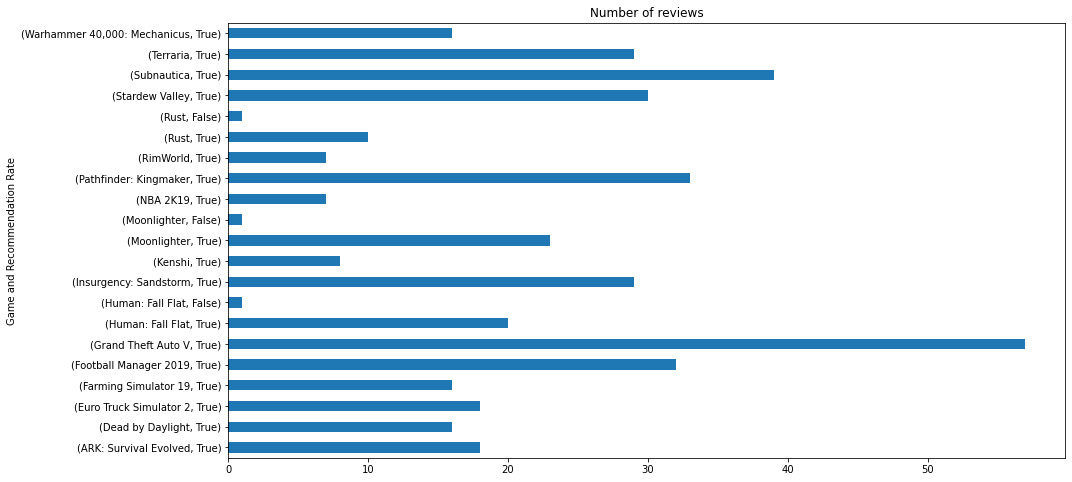

In [31]:
grouped_metacritic['true_false'].value_counts().plot.barh(figsize=(15, 8),title='Number of reviews', xlabel='Game and Recommendation Rate')

For Metacritic, we can see that a lot of the games have no negative reviews and for those that do have, their number is very low

Since the number of Steam reviews is significantly higher than the Metacritic ones, a log scale will be used for visualising the Positive and Negative reviews

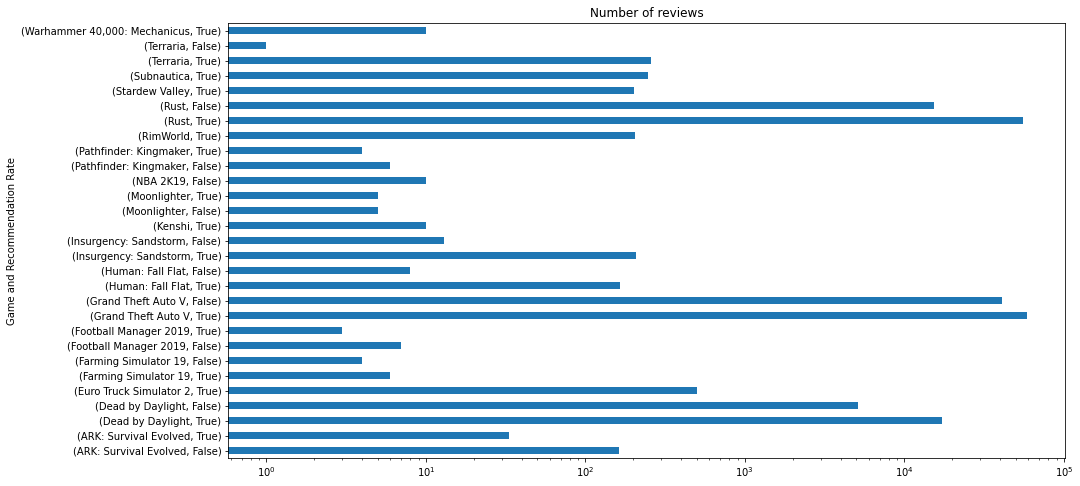

In [32]:
plt = grouped_steam['true_false'].value_counts().plot.barh(figsize=(15, 8),title='Number of reviews', xlabel='Game and Recommendation Rate')
plt.set_xscale('log')

For Steam, the number of Negative reviews is certainly a lot higher, compared to Metacritic and some games do not even have Positive reviews!

# Estimate the Sales of Steam games through its reviews

Steam game sale data is not made publicly available. Most videogame market researchers and game developers estimates a games success in the PC market by looking at the number of reviews the game has recieved. A metric known as the Boxleiter number has commonly been used the main way to get the estimate of steam sales.  The Boxleiter number takes the 'Would you recommend this game to other players?' shown in a games launch page.  The assumption here is the more reviews a game has on steam then the more the people have seen the game's launch page and thus more people owning the game.

The point of this notebook is to show that simply using the number of reviews have on steam is not enough to accurately predict the success a game has on the market.  We will be using an estimated number of owner of a game on Steam with a third party website called SteamSpy.  Due to only being an estimate the reliability of the model trained and analysed here is dependent on SteamSpy's own estimates.

In [33]:
import scipy as sc
from scipy.stats import norm
import seaborn as sns

import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from sklearn.model_selection import train_test_split
from statsmodels.tools import add_constant
import statsmodels.api as sm1 #for multiple regression

import statistics

## Data Clean-up

In [34]:
df = pd.read_csv('data/clean_steam_general.csv')

In [35]:
df.head()

,QueryName,ResponseName,ReleaseDate,RequiredAge,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,...,PurchaseAvail,SubscriptionAvail,PlatformWindows,PlatformLinux,PlatformMac,GenreIsEarlyAccess,GenreIsFreeToPlay,PriceCurrency,PriceInitial,PriceFinal
0,Counter-Strike,Counter-Strike,Nov 1 2000,0,88,68991,13,13033334,92789,9140731,...,True,False,True,True,True,False,False,USD,9.99,9.99
1,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,2439,5,5399140,60368,753627,...,True,False,True,True,True,False,False,USD,4.99,4.99
2,Day of Defeat,Day of Defeat,May 1 2003,0,79,2319,5,7621102,71499,1709740,...,True,False,True,True,True,False,False,USD,4.99,4.99
3,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,888,4,7498965,70936,789676,...,True,False,True,True,True,False,False,USD,4.99,4.99
4,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,2934,5,5399499,60370,705741,...,True,False,True,True,True,False,False,USD,4.99,4.99


In [36]:
# we only take columns that we care about
df_sales = df[['Metacritic', 'RecommendationCount', 'SteamSpyOwners','SteamSpyOwnersVariance', 'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance', 'IsFree', 'PurchaseAvail', 'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'PriceInitial', 'PriceFinal']]
df_sales.head()

,Metacritic,RecommendationCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,IsFree,PurchaseAvail,PlatformWindows,PlatformLinux,PlatformMac,GenreIsEarlyAccess,GenreIsFreeToPlay,PriceInitial,PriceFinal
0,88,68991,13033334,92789,9140731,78136,False,True,True,True,True,False,False,9.99,9.99
1,0,2439,5399140,60368,753627,22699,False,True,True,True,True,False,False,4.99,4.99
2,79,2319,7621102,71499,1709740,34145,False,True,True,True,True,False,False,4.99,4.99
3,0,888,7498965,70936,789676,23235,False,True,True,True,True,False,False,4.99,4.99
4,0,2934,5399499,60370,705741,21968,False,True,True,True,True,False,False,4.99,4.99


In [37]:
# remove any outliers in metacritic score, recommendationcount, steamspyowners, steamspyplayerestimate

#check if the datatypes are correct
print(df_sales.dtypes[['Metacritic', 'RecommendationCount', 'SteamSpyOwners','SteamSpyOwnersVariance', 'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance', 'IsFree', 'PurchaseAvail', 'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'PriceInitial', 'PriceFinal']])
#df_sales['ResponseName'] = df_sales['ResponseName'].astype(str) #

# keep only the ones that are within +3 to -3 standard deviations in the columns 'Metacritic', 'RecommendationCount', 'SteamSpyOwners', 'SteamSpyPlayersEstimate', 
df_sales = df_sales[np.abs(df_sales['Metacritic']-df_sales['Metacritic'].mean()) <= (3*df_sales['Metacritic'].std())]
df_sales = df_sales[np.abs(df_sales['RecommendationCount']-df_sales['RecommendationCount'].mean()) <= (3*df_sales['RecommendationCount'].std())]
df_sales = df_sales[np.abs(df_sales['SteamSpyOwners']-df_sales['SteamSpyOwners'].mean()) <= (3*df_sales['SteamSpyOwners'].std())]
df_sales = df_sales[np.abs(df_sales['SteamSpyPlayersEstimate']-df_sales['SteamSpyPlayersEstimate'].mean()) <= (3*df_sales['SteamSpyPlayersEstimate'].std())]

Metacritic                   int64
RecommendationCount          int64
SteamSpyOwners               int64
SteamSpyOwnersVariance       int64
SteamSpyPlayersEstimate      int64
SteamSpyPlayersVariance      int64
IsFree                        bool
PurchaseAvail                 bool
PlatformWindows               bool
PlatformLinux                 bool
PlatformMac                   bool
GenreIsEarlyAccess            bool
GenreIsFreeToPlay             bool
PriceInitial               float64
PriceFinal                 float64
dtype: object


## EDA

In [38]:
# Data summary
df_sales.describe()

,Metacritic,RecommendationCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,PriceInitial,PriceFinal
count,12790.000000,12790.000000,1.279000e+04,12790.000000,12790.000000,12790.000000,12790.000000,12790.000000
mean,10.383112,314.277561,5.945671e+04,4088.007819,30504.859812,2894.905864,8.848099,8.503396
std,25.335544,1259.770790,1.358313e+05,4899.656060,69730.264776,3545.782653,14.216930,13.508905
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.170000e+02,858.000000,533.000000,740.000000,1.990000,1.990000
50%,0.000000,0.000000,8.250000e+03,2377.000000,3408.000000,1567.000000,5.990000,4.990000
75%,0.000000,191.000000,4.555500e+04,5586.000000,20805.000000,3775.000000,9.990000,9.990000
max,94.000000,44352.000000,1.635130e+06,33395.000000,484961.000000,18216.000000,449.990000,449.990000


The average metacritic score is only 10 out 100 meaning that most the games are considered to be bad by professional reviewers.    

In [39]:
#get the correlation matrix
corr = df_sales.corr()
print(corr)

                         Metacritic  RecommendationCount  SteamSpyOwners  \
Metacritic                 1.000000             0.206436        0.381336   
RecommendationCount        0.206436             1.000000        0.380106   
SteamSpyOwners             0.381336             0.380106        1.000000   
SteamSpyOwnersVariance     0.442308             0.385891        0.919436   
SteamSpyPlayersEstimate    0.386289             0.498162        0.888300   
SteamSpyPlayersVariance    0.444223             0.454009        0.851495   
IsFree                    -0.073051             0.038733        0.181196   
PurchaseAvail              0.172834             0.055375        0.023185   
PlatformWindows            0.005125             0.002142        0.002527   
PlatformLinux              0.039227             0.031120        0.016672   
PlatformMac                0.055040             0.040123        0.052537   
GenreIsEarlyAccess        -0.144054            -0.029138       -0.090078   
GenreIsFreeT

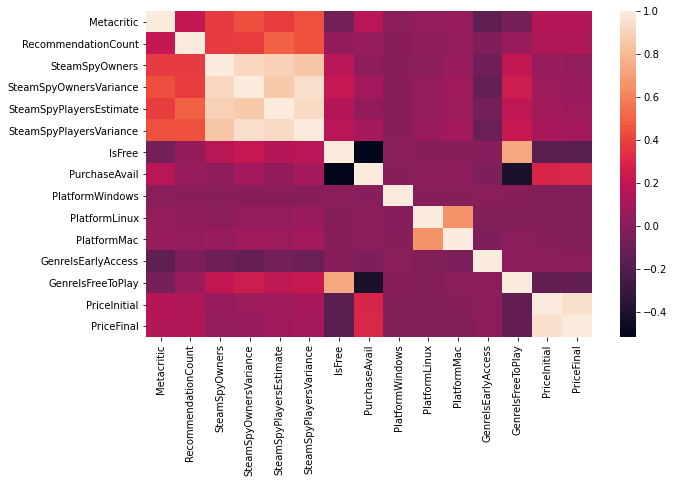

In [40]:
#correlation heatmap
#the darker the color the worse the correlation
corr_heatmap = sns.heatmap(corr)
plt.show()
fig = corr_heatmap.get_figure()
fig.savefig('figures/corr_heatmap.png')

The most correlated variables are the SteamSpy variables to each other and PriceInitial and PriceFinal.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

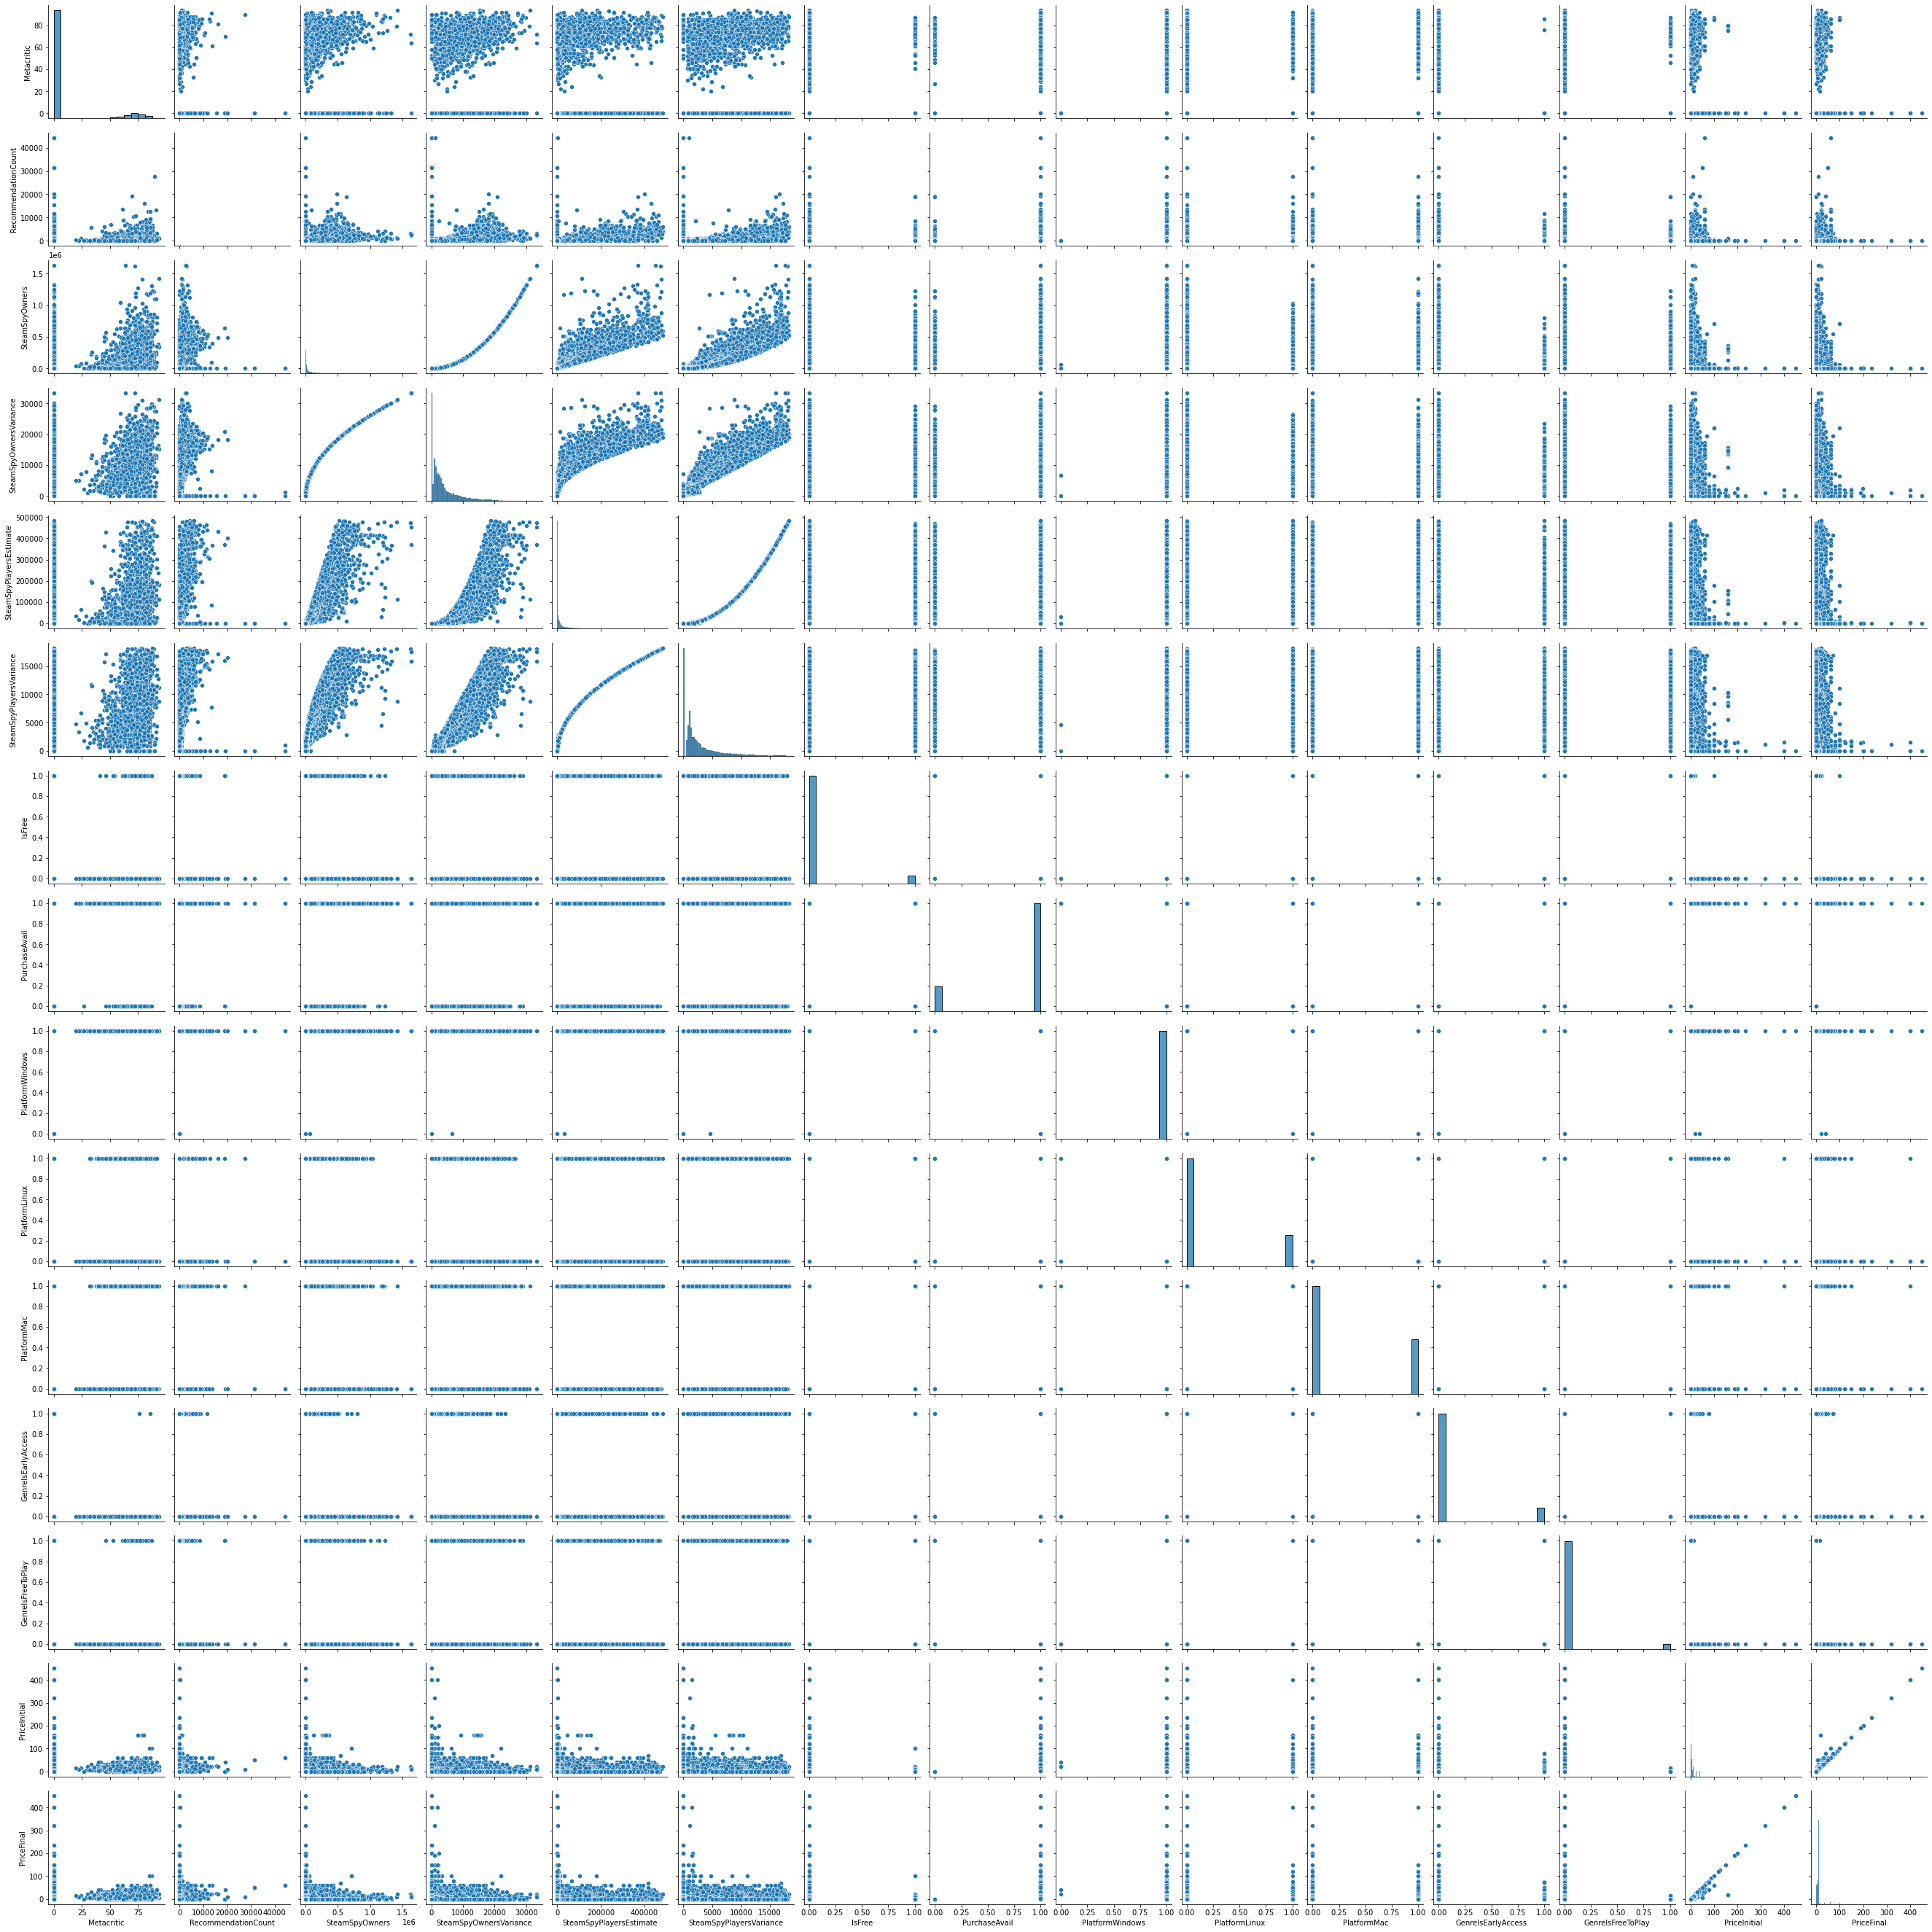

In [41]:
#reference scatter matrix.  
scatter_matrix = sns.pairplot(df_sales[['Metacritic', 'RecommendationCount', 'SteamSpyOwners','SteamSpyOwnersVariance', 'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance', 'IsFree', 'PurchaseAvail', 'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'PriceInitial', 'PriceFinal']])
plt.savefig('sales_scatter.jpg') #saving plot since this takes awhile to run
# the warning given is just numpy converting the booleans to [0,1]
# It looks better on the jpg image viewer than on Jupyter notebook

In [42]:
# fit regression model with statsmodel
boxleiter = sm.ols(formula="SteamSpyOwners ~ RecommendationCount", data=df_sales).fit()
boxleiter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SteamSpyOwners   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2160.
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:37:44   Log-Likelihood:            -1.6832e+05
No. Observations:               12790   AIC:                         3.366e+05
Df Residuals:                   12788   BIC:                         3.367e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.658e+04   1145.007     40.678      0.000    4.43e+04    4.88e+04
RecommendationCount    40.9839      0.882     46.472      0.000      39.255      42.713
==============================================================================
Omnibus:                     9926.679   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           803326.461
Skew:                           3.123   Prob(JB):                         0.00
Kurtosis:                      41.320   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{'Intercept': 46576.38971946709, 'RecommendationCount': 40.98389333492951}


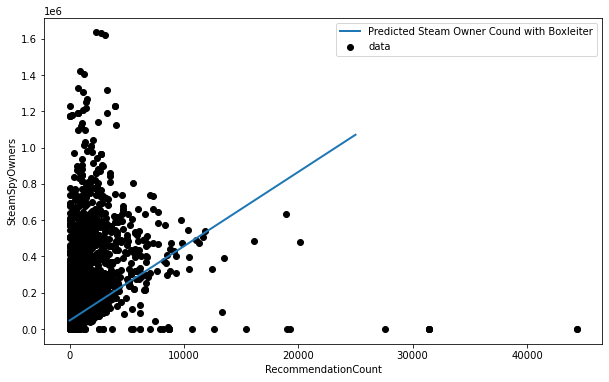

In [43]:
par1 = dict(boxleiter.params)

plt.scatter(df_sales['RecommendationCount'],df_sales['SteamSpyOwners'],color='black',label="data")
x = np.linspace(0, 25000)
y1 = par1["Intercept"] + par1['RecommendationCount']*x

plt.plot(x,y1,label="Predicted Steam Owner Cound with Boxleiter",linewidth=2)
plt.legend()
plt.xlabel('RecommendationCount'); plt.ylabel('SteamSpyOwners')
#plt.ylim((0,50))
#plt.show()
plt.savefig('figures/boxleitter.png')
print(par1)

The Boxleiter number in the our data fails with a R-square value between RecommendationCount and SteamSpyOwners of 0.14.  The R-square means that only 14% of the variance of SteamSpyOwners is explained by RecommendationCount.  The Boxleiter number here might be failing because we are using SteamSpy estimates.

In [44]:
## Beat the Boxleiter number

We already know that there is a high correlation of SteamSpyPlayersEstimate and SteamSpyOwner.  Concurrent players of a game is something that steam actually share unlike steam sale.  The concurrent player is taken by SteamSpy and converted into an average count of player at any given day.   This would mean that we would not have to be as skittish about using it as a predictor.

Predictors that might have an effect on SteamSpyOwners;

- Having more platforms for a game might show more positive effects
- A game being free
- A game's price

[12788, 4289, 2865]


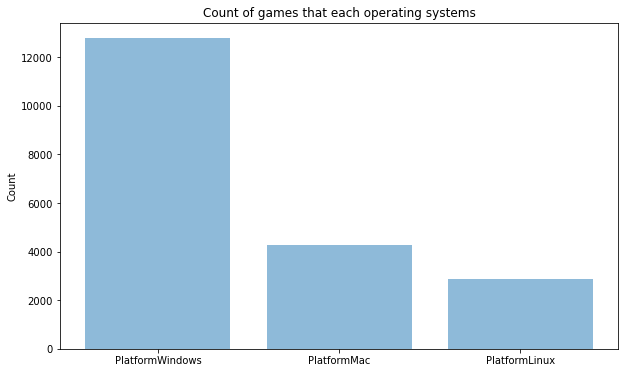

In [45]:
#bar chart
windows_count = df_sales['PlatformWindows'].sum()
mac_count = df_sales['PlatformMac'].sum()
linux_count = df_sales['PlatformLinux'].sum()
x = ('PlatformWindows', 'PlatformMac', 'PlatformLinux')
x_pos = np.arange(len(x))
counts = [windows_count,mac_count, linux_count]
print(counts)

plt.bar(x_pos,counts, align='center', alpha=0.5)
plt.xticks(x_pos, x)
plt.ylabel('Count')
plt.title('Count of games that each operating systems')
#plt.show()
plt.savefig('figures/platforms.png')

Windows dominates the PC gaming scene with a minority of games being ported into Mac and Linux.  This should imply that that if a game is ported then that would mean that it is likely to have been successful enough to warant the port cost for the developers.

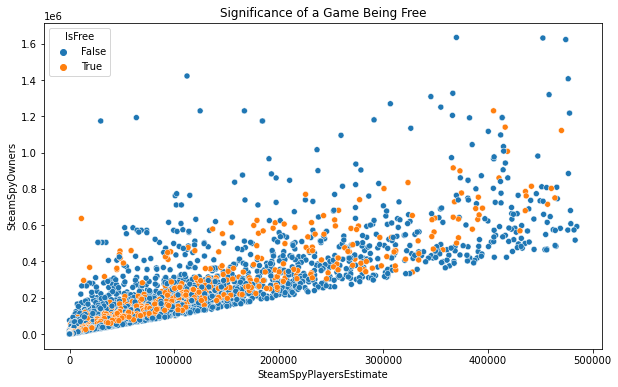

In [46]:
#do something with scatterplots and the booleans just to see if there is something there
sns.scatterplot(data=df_sales, x="SteamSpyPlayersEstimate", y="SteamSpyOwners", hue='IsFree')
plt.xlabel('SteamSpyPlayersEstimate')
plt.ylabel('SteamSpyOwners')
plt.title('Significance of a Game Being Free')
plt.savefig('figures/isFree.png')

Text(0.5, 1.0, 'Significance of a Game Costing Money')

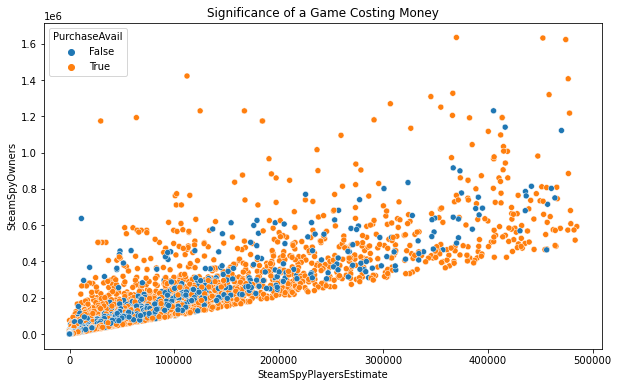

In [47]:
sns.scatterplot(data=df_sales, x="SteamSpyPlayersEstimate", y="SteamSpyOwners", hue='PurchaseAvail')
plt.xlabel('SteamSpyPlayersEstimate')
plt.ylabel('SteamSpyOwners')
plt.title('Significance of a Game Costing Money')

There does not seem to be any visible effect of game being free and the number of people who own the game.  So a game's 'freeness' is not really a good predictor to see how successful a game has been.

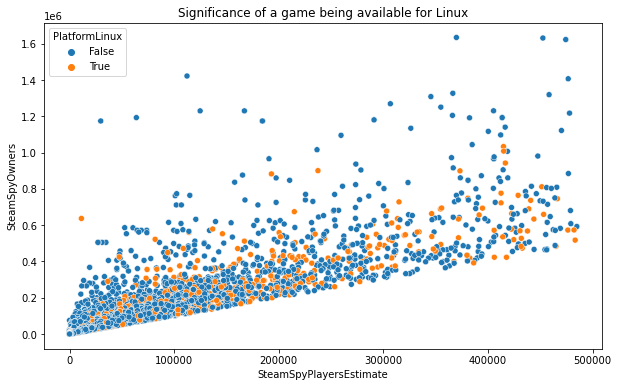

In [48]:
sns.scatterplot(data=df_sales, x="SteamSpyPlayersEstimate", y="SteamSpyOwners", hue='PlatformLinux')
plt.xlabel('SteamSpyPlayersEstimate')
plt.ylabel('SteamSpyOwners')
plt.title('Significance of a game being available for Linux')
plt.savefig('figures/linux.png')

We only see a pattern of Linux ported games having more owner but not significant enough to justify it being used as a predictor.

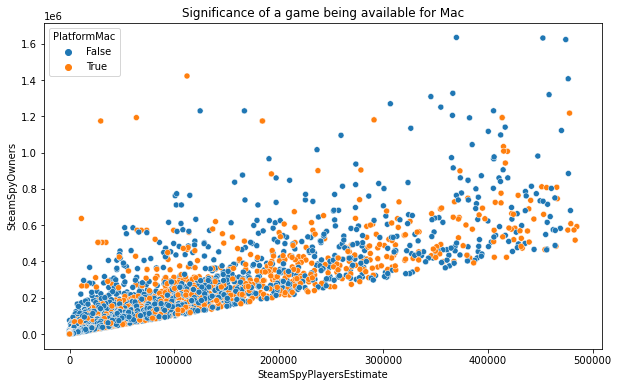

In [49]:
sns.scatterplot(data=df_sales, x="SteamSpyPlayersEstimate", y="SteamSpyOwners", hue='PlatformMac')
plt.xlabel('SteamSpyPlayersEstimate')
plt.ylabel('SteamSpyOwners')
plt.title('Significance of a game being available for Mac')
plt.savefig('figures/mac.png')

Similarly for a game being ported into Mac, we don't really see any significance to justify it being a predictor.

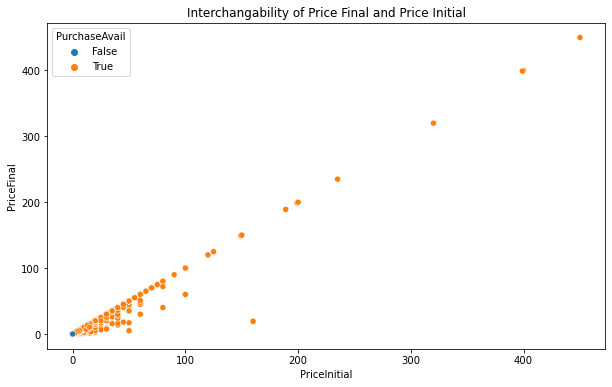

In [50]:
#just to show that PriceInitial and PriceFinal can be used interchangably
sns.scatterplot(data=df_sales, x="PriceInitial", y="PriceFinal", hue='PurchaseAvail')
plt.xlabel('PriceInitial')
plt.ylabel('PriceFinal')
plt.title('Interchangability of Price Final and Price Initial')
plt.savefig('figures/price_init_final.png')

The figure above shows that we can use PriceInitial and PriceFinal interchangably as a predictor.  The R-square of PriceInitial and PriceFinal is .90

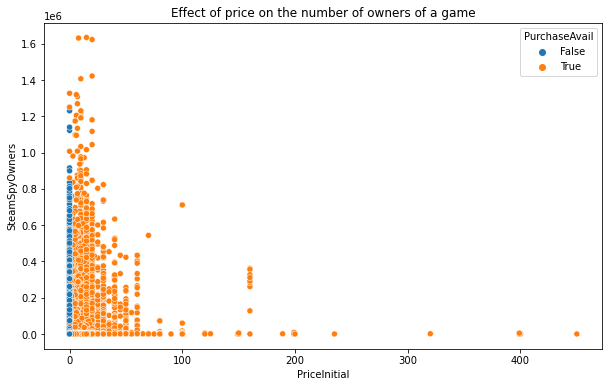

In [51]:
#just to show that PriceInitial and PriceFinal can be used interchangably
sns.scatterplot(data=df_sales, x="PriceInitial", y="SteamSpyOwners", hue='PurchaseAvail')
plt.xlabel('PriceInitial')
plt.ylabel('SteamSpyOwners')
plt.title('Effect of price on the number of owners of a game')
plt.savefig('figures/price-owners.png')

There is no clear pattern for the cost of a game and the number of people who own the game.

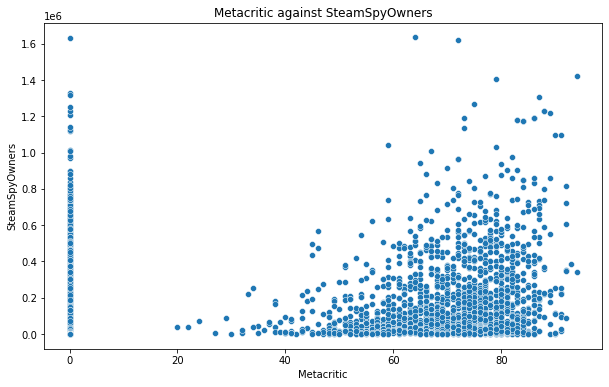

In [52]:
sns.scatterplot(data=df_sales, x="Metacritic", y="SteamSpyOwners")
plt.xlabel('Metacritic')
plt.ylabel('SteamSpyOwners')
plt.title('Metacritic against SteamSpyOwners')
plt.savefig('figures/metacritic-owners.png')

There seems to be a significant pattern with metacritic and SteamSpyOwners which implies that it is a good predictor for a model

In [53]:
owners = sm.ols(formula="SteamSpyOwners ~ SteamSpyPlayersEstimate + Metacritic", data=df_sales).fit()
owners.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SteamSpyOwners   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 2.417e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:37:51   Log-Likelihood:            -1.5931e+05
No. Observations:               12790   AIC:                         3.186e+05
Df Residuals:                   12787   BIC:                         3.186e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5203.4915    616.594      8.439      0.000    3994.875    6412.108
SteamSpyPlayersEstimate     1.6966      0.009    198.610      0.000       1.680       1.713
Metacritic                240.6899     23.511     10.237      0.000     194.605     286.774
==============================================================================
Omnibus:                    15204.131   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3148339.357
Skew:                           6.130   Prob(JB):                         0.00
Kurtosis:                      78.878   Cond. No.                     8.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{'Intercept': 5203.491520350191, 'SteamSpyPlayersEstimate': 1.6965856147791598, 'Metacritic': 240.68987488995757}


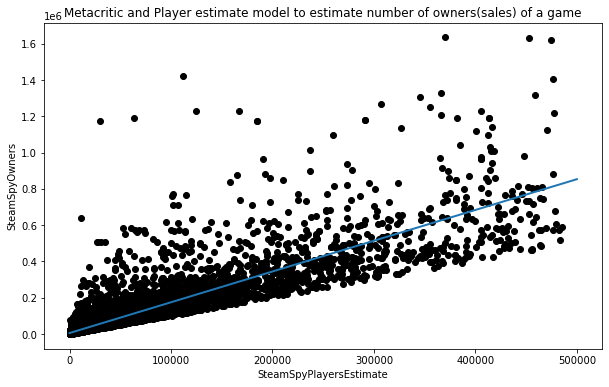

In [54]:
par = dict(owners.params)

plt.scatter(df_sales['SteamSpyPlayersEstimate'],df_sales['SteamSpyOwners'],color='black',label="data")
x = np.linspace(0, 500000)
y1 = par["Intercept"] + par['SteamSpyPlayersEstimate']*x

plt.plot(x,y1,linewidth=2)
plt.xlabel('SteamSpyPlayersEstimate'); plt.ylabel('SteamSpyOwners')
plt.title("Metacritic and Player estimate model to estimate number of owners(sales) of a game")
#plt.show()
plt.savefig('figures/our-model.png')
print(par)

The model without cross-validation out performs the Boxleiter number.

In [55]:
#Cross-validation method
X = df_sales[['SteamSpyPlayersEstimate', 'Metacritic']]
# the two following might be autocorrelated to each other.
#'GaragCap': # of parking spots
#'PkgSpacs': # of parking spaces
Y = df_sales['SteamSpyOwners']
x_train, x_test, y_train, y_test = train_test_split(X, Y)
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)
print("x_train length=",len(x_train), " , x_test length=",len(x_test), " , y_train length=",len(y_train), " , y_test length=",len(y_test))
regression.score(x_test, y_test) # how well is the performance when predicting how many people would own the game

x_train length= 9592  , x_test length= 3198  , y_train length= 9592  , y_test length= 3198


0.7939017189021862

With cross validation the linear model is 80.37% accurate in predicting the number of people who own a game on steam.

In [56]:
# Ridge and Lasso regression imports
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error

In [57]:
ridge_regression = Ridge(alpha=10, fit_intercept=True)
ridge_regression.fit(x_train, y_train) # We don't need to standardize the predictors here with scale(x_train)

print('Ridge regression model:\n {} + {}^T . x'.format(ridge_regression.intercept_, ridge_regression.coef_))
print('Train R^2: {}, test R^2: {}'.format(ridge_regression.score(x_train,y_train),
                                           ridge_regression.score(x_test, y_test)))

Ridge regression model:
 5373.795273284835 + [  1.7032093  219.53252226]^T . x
Train R^2: 0.7897592446768718, test R^2: 0.7939017167268916


In [58]:
lasso_regression = Lasso(alpha=1, fit_intercept=True, max_iter=10000)
lasso_regression.fit(x_train, y_train)

print('Lasso regression model:\n {} + {}^T . x'.format(lasso_regression.intercept_, lasso_regression.coef_))
print('Train R^2: {}, test R^2: {}'.format(lasso_regression.score(x_train, y_train), 
                                           lasso_regression.score(x_test, y_test)))

Lasso regression model:
 5373.803907385816 + [  1.70320949 219.53112505]^T . x
Train R^2: 0.78975924467678, test R^2: 0.7939017093987133


The Ridge and Lasso regrssion both have the same accuracy as the multiple linear model on predicting the number of owners a game has.  This means that regularization does not really have an effect this model.

# Comparing reviews with game-popularity

In [59]:
df = pd.read_csv('data/steam_reviews.csv')

Here the dataframe is split up in lists of certain selected games. To save processing time, the unused games are commented out.

In [60]:
list = []
#list2 = []
#list3 = []
#list4 = []
#list5 = []
#list6 = []
#list7 = []
list8 = []
#list9 = []
for x in range(len(df.index)):
    if df.iloc[x,7] != 'Dead by Daylight':
        list.append(x)
    #if df.iloc[x,7] != 'Expansion - Hearts of Iron IV: Man the Guns':
        #list2.append(x)
    #if df.iloc[x,7] != 'Warhammer 40,000: Mechanicus':
        #list3.append(x)
    #if df.iloc[x,7] != "PLAYERUNKNOWN'S BATTLEGROUNDS":
        #list4.append(x)
    #if df.iloc[x,7] != 'Grand Theft Auto V':
        #list5.append(x)
    #if df.iloc[x,7] != 'Rust':
        #list6.append(x)
    #if df.iloc[x,7] != 'Rocket League®':
        #list7.append(x)
    if df.iloc[x,7] != "Tom Clancy's Rainbow Six® Siege":
        list8.append(x)
    #if df.iloc[x,7] != "The Elder Scrolls V: Skyrim Special Edition":
        #list9.append(x)
        

g1 = df.drop(list)
#g2 = df.drop(list2)
#g3 = df.drop(list3)
#g4 = df.drop(list4)
#g5 = df.drop(list5)
#g6 = df.drop(list6)
#g7 = df.drop(list7)
g8 = df.drop(list8)
#g9 = df.drop(list9)

Splitting up the recommendations into positive and negative and saving only the date of reviewal.

In [61]:
goodG1 = []
badG1 = []

for x in range(len(g1.index)):
    if g1.iloc[x,5] == "Not Recommended":
        badG1.append(g1.iloc[x,0])
    else:
        goodG1.append(g1.iloc[x,0])

goodG8 = []
badG8 = []

for x in range(len(g8.index)):
    if g8.iloc[x,5] == "Not Recommended":
        badG8.append(g8.iloc[x,0])
    else:
        goodG8.append(g8.iloc[x,0])

Another list gets created that contains all possible review dates (months).

In [62]:
finalG1 = []
for x in range(len(g1)):
    if(g1.iloc[x,0][:7] not in finalG1):
        finalG1.append(g1.iloc[x,0][:7])
        
finalG1 = sorted(finalG1)
#finalG1

finalG8 = []
for x in range(len(g8)):
    if(g8.iloc[x,0][:7] not in finalG8):
        finalG8.append(g8.iloc[x,0][:7])
        
finalG8 = sorted(finalG8)

finalG8

['2016-06',
 '2016-11',
 '2016-12',
 '2017-06',
 '2017-07',
 '2018-01',
 '2018-05',
 '2018-11',
 '2018-12']

Each date (monthly) has a integer connected to it. If there is a positive review on that date +1 and of there is a negative date -1. The last known month is also removed from the dataset, as the reviews in this month are not all fully written yet.

In [63]:
finalG1Count = [0] * len(finalG1)

for x in range(len(goodG1)):
    finalG1Count[finalG1.index(goodG1[x][:7])] += 1
for x in range(len(badG1)):
    finalG1Count[finalG1.index(badG1[x][:7])] -= 1
    
finalG1.pop(32)
finalG1Count.pop(32)

for x in range(len(finalG1)):
    finalG1[x] = finalG1[x][2:7]

#finalG1
    
finalG8Count = [0] * len(finalG8)

for x in range(len(goodG8)):
    finalG8Count[finalG8.index(goodG8[x][:7])] += 1
for x in range(len(badG8)):
    finalG8Count[finalG8.index(badG8[x][:7])] -= 1
    
finalG8.pop(8)
finalG8Count.pop(8)

for x in range(len(finalG8)):
    finalG8[x] = finalG8[x][2:7]

The monthly players data gets added as a dataset. This data is from Steamcharts.com, which is a thirdparty website that utilizes Steam's public data. The data is manually added as a list.

In [64]:
g1Popularity = [18011,23743,42268,24120,29147,29783,42895,31992,23442,20082,17124,20067,22352,23814,27166,38698,36343,31039,26850,33164,33397,23707,22439,36414,36423,46865,36374,62756,51065,40901,38560,41441]
#g1Popularity

g8Popularity = [15295,42265,30859,43057,47328,109103,142362,115820]

As the number of players and the number of reviews is far off from each other, we instead take the relative difference compared to previous month. By having the values in a percentual difference, it is easier to compare them. 

In [65]:
g1ReviewDifference = [0] * len(finalG1)
g1PopDifference = [0] * len(finalG1)

for x in range(1,len(finalG1)):
    g1ReviewDifference[x] = finalG1Count[x-1] / finalG1Count[x]
    g1PopDifference[x] = g1Popularity[x-1] / g1Popularity[x]

g8ReviewDifference = [0] * len(finalG8)
g8PopDifference = [0] * len(finalG8)

for x in range(1,len(finalG8)):
    g8ReviewDifference[x] = finalG8Count[x-1] / finalG8Count[x]
    g8PopDifference[x] = g8Popularity[x-1] / g8Popularity[x]

# Graph analysis

These graphs shows the change in each month of both the recommendations (blue) and the popularity (orange) of the games (Dead by daylight & Rainbow six siege). While the recommendations occasionally peak, the popularity does not increase the month after. Meaning that the reviews do not have a major impact on the game's popularity and therefore also the sales.

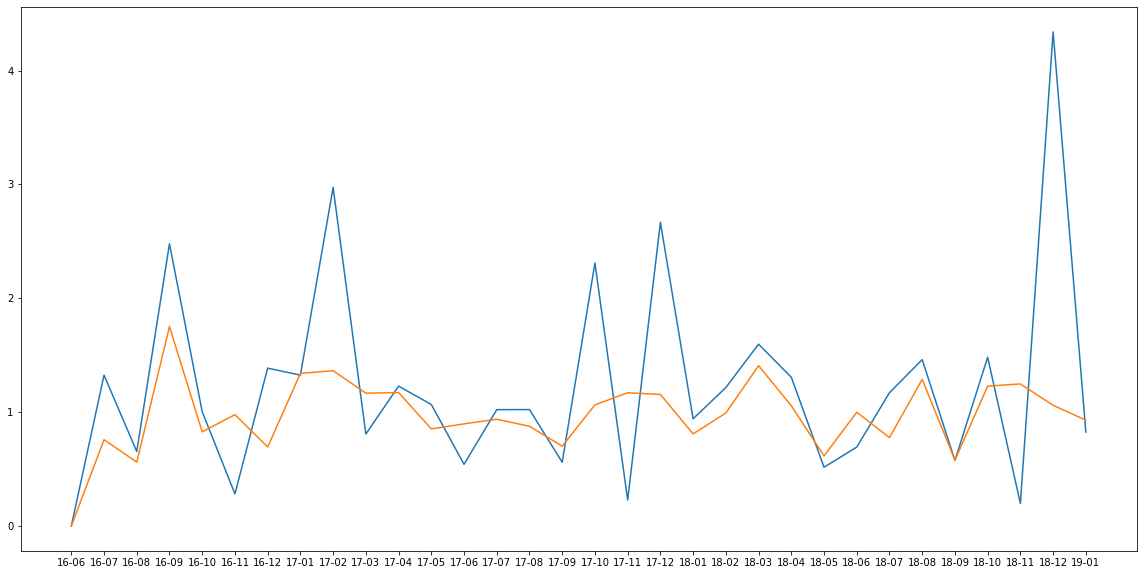

In [66]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(finalG1, g1ReviewDifference, label = "Reviews")
plt.plot(finalG1, g1PopDifference, label = "Popularity")
plt.show()

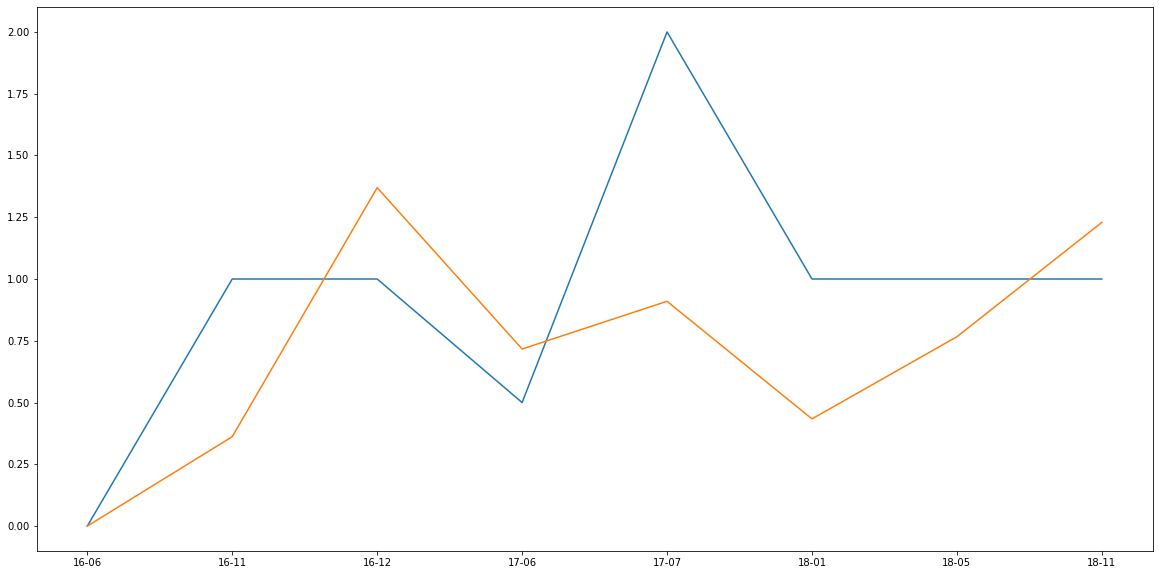

In [67]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(finalG8, g8ReviewDifference, label = "Reviews")
plt.plot(finalG8, g8PopDifference, label = "Popularity")
plt.show()

Here the mean and standard deviation is calculated for additional data.

In [68]:
meanReviews = statistics.mean(g1ReviewDifference)
stdevReviews = statistics.stdev(g1ReviewDifference)

meanPop = statistics.mean(g1PopDifference)
stdevPop = statistics.stdev(g1PopDifference)

print("R mean: " + str(meanReviews))
print("P mean: " + str(meanPop))

print("R standard deviation: " + str(stdevReviews))
print("P standard deviation: " + str(stdevPop))

R mean: 1.2257888117020157
P mean: 0.9773918095009384
R standard deviation: 0.9043395156377356
P standard deviation: 0.32200791039747234


Sources:

[1] https://newsletter.gamediscover.co/p/how-that-game-sold-on-steam-using

[2] http://greyaliengames.com/blog/how-to-estimate-how-many-sales-a-steam-game-has-made/

[3] https://www.gamasutra.com/blogs/JakeBirkett/20180504/317366/Using_Steam_reviews_to_estimate_sales.php

Datasets:

- https://data.world/craigkelly/steam-game-data

- https://www.kaggle.com/luthfim/steam-reviews-dataset

- https://www.kaggle.com/skateddu/metacritic-critic-games-reviews-20112019?select=metacritic_critic_reviews.csv

Ethical considerations <br>
- How did you get the data? <br>
    The datasets containing Steam and Metacritic reviews were taken from Kaggle repositories, while the Steam games info was taken from data.world <br>
- Did you check the source? <br>
    All of the datasets are publicly avaliable and as such, do not share confidential information <br>
    The Steam game data was collected using Steam's publicly available API and steamspy <br>
    The Steam reviews set contains reviews from Steam's best selling games as February 2019, while there is no notable information about the Metacritic set.
- Did you have to make decisions that affect the analysis? <br>
    Since Steam itself does not release how many people bought the game, some of the originally proposed analysis questions concerning the sales had to be changed a bit. <br>
- What are the limitations of your analysis and your conclusions? <br>
    The main limitation is the fact that the reviews used do not cover the entire potential userbase, as well as the fact that some of the information in the datasets come from aproximations which may be inaccurate (e.g SteamSpy) <br>
- Who are the stakeholders of your project? <br>
    The stakeholders of the project include the team members working on it, the (non-existant) owners, or in this case the Data Analysis tutor (Jerry Spanakis) and his assisstants and the potential investors that support it.   <br>
- Who can benefit from this project, who can be harmed, who is excluded, etc. <br>
    The potential people who could benefit from this project are the Game developers who could use the insight gained from the data for measuring the sales success of their games, as well as the potential buyers of said games when basing their decision on reviews. <br>